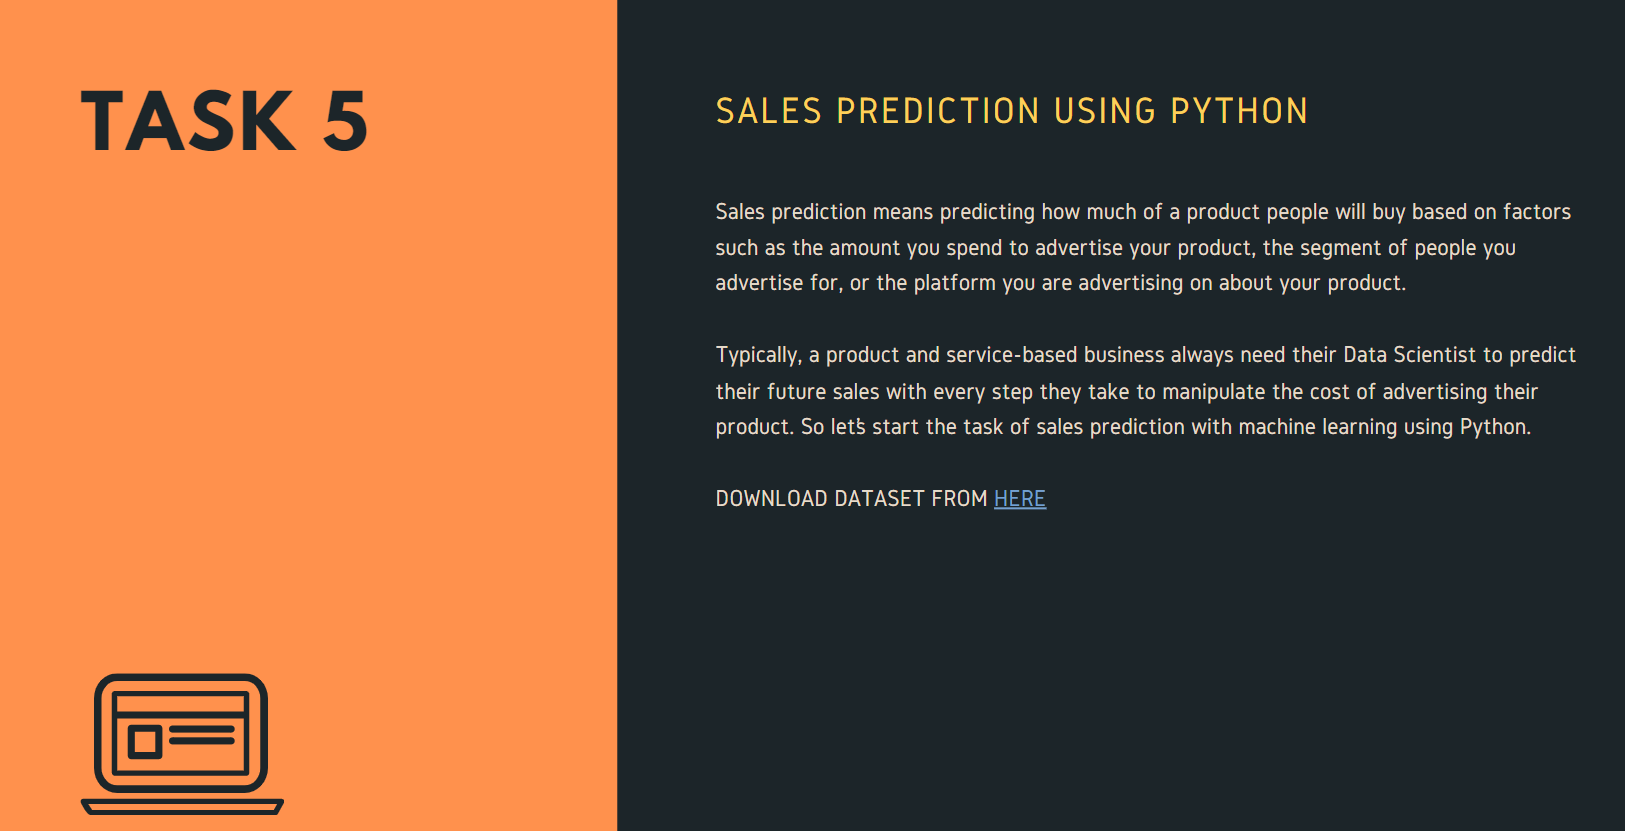

***Task 5 SALES PREDICTION USING PYTHON***

**importing all the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the csv dataset as a pandas dataframe.**

In [2]:
df=pd.read_csv("/content/Advertising.csv")

**Data Understanding**

In [3]:
pd.concat([df.head(),df.tail()])

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.shape

(200, 5)

In [7]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

<ipython-input-9-965c64539263>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

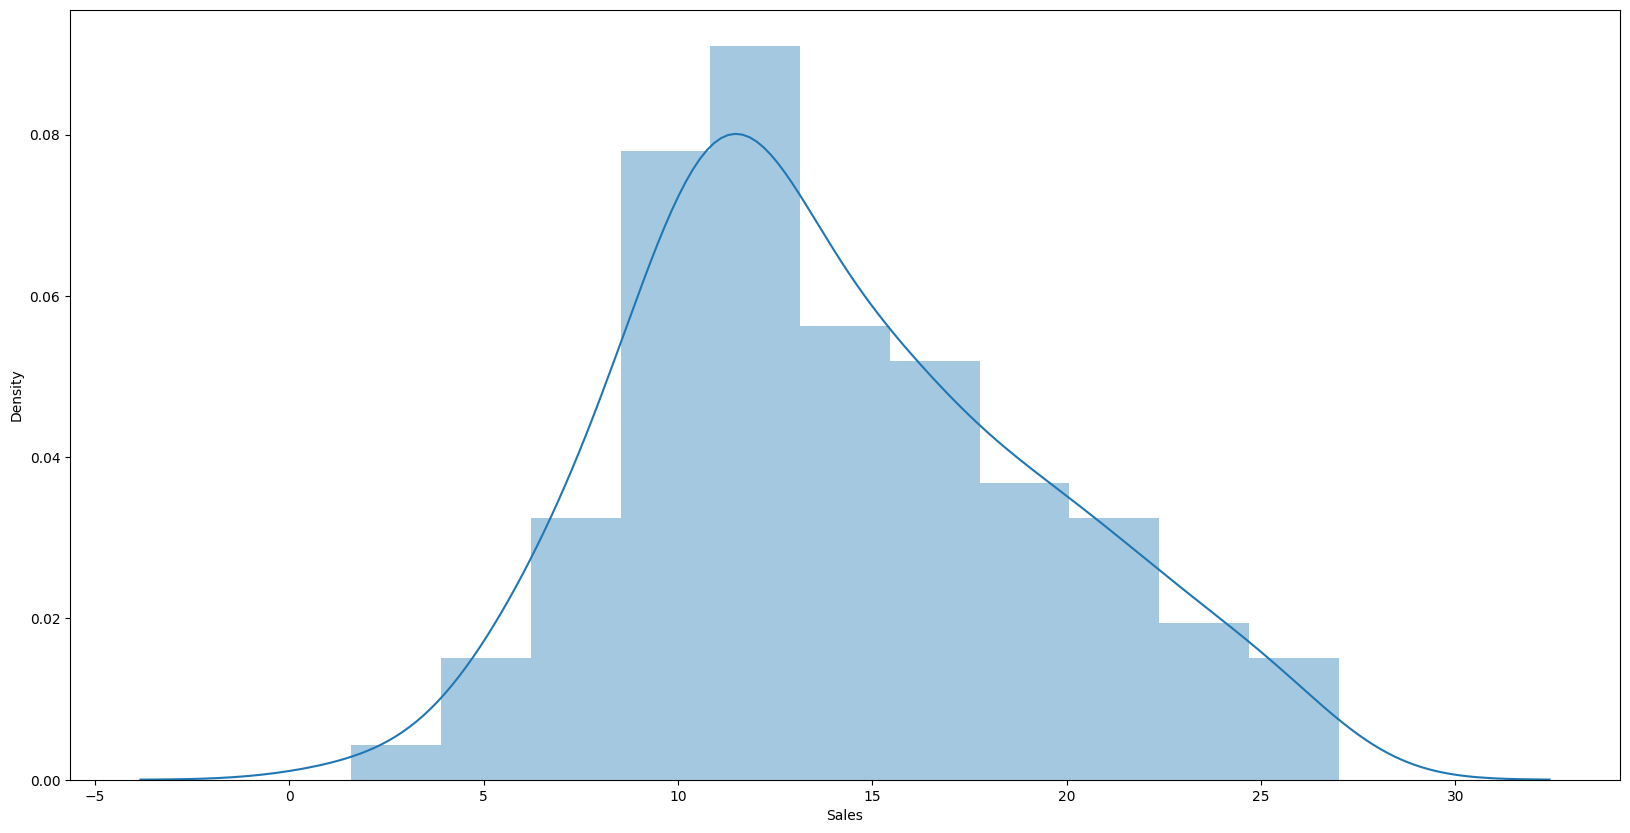

In [9]:
plt.figure(figsize=(20,10))       #Distribution of sales
sns.distplot(df['Sales'])

In [ ]:
plt.figure(figsize=(20,10))       #Distribution of TV
sns.distplot(df['TV'])

In [ ]:
plt.figure(figsize=(20,10))       #Distribution of Radio
sns.distplot(df['Radio'])

<ipython-input-11-5bb51e7ad77d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

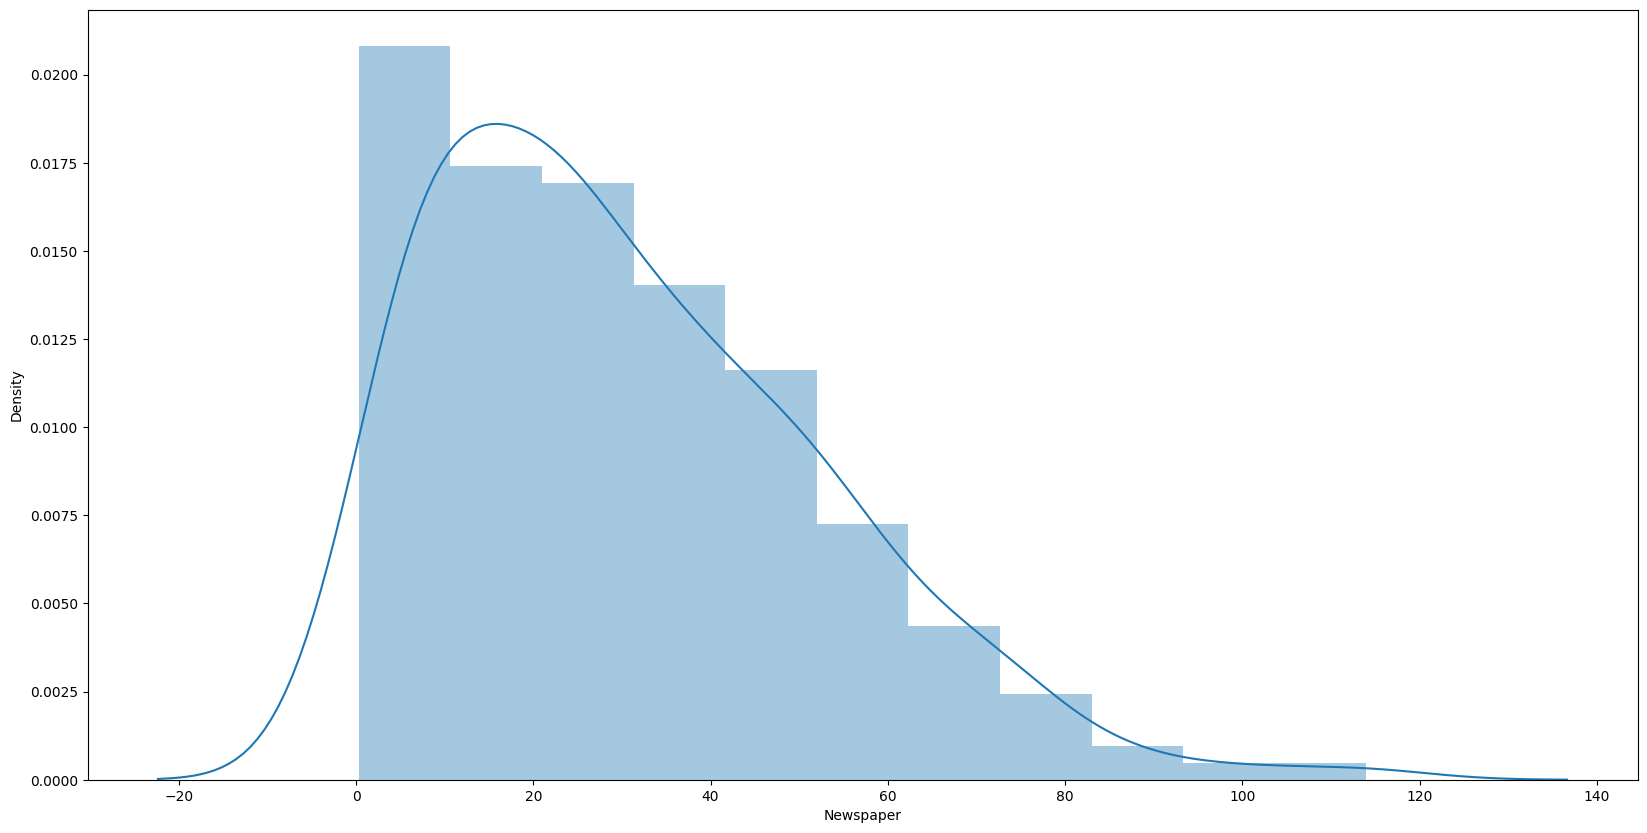

In [11]:
plt.figure(figsize=(20,10))       #Distribution of newspaper
sns.distplot(df['Newspaper'])

In [12]:
df.duplicated().value_counts()

False    200
dtype: int64

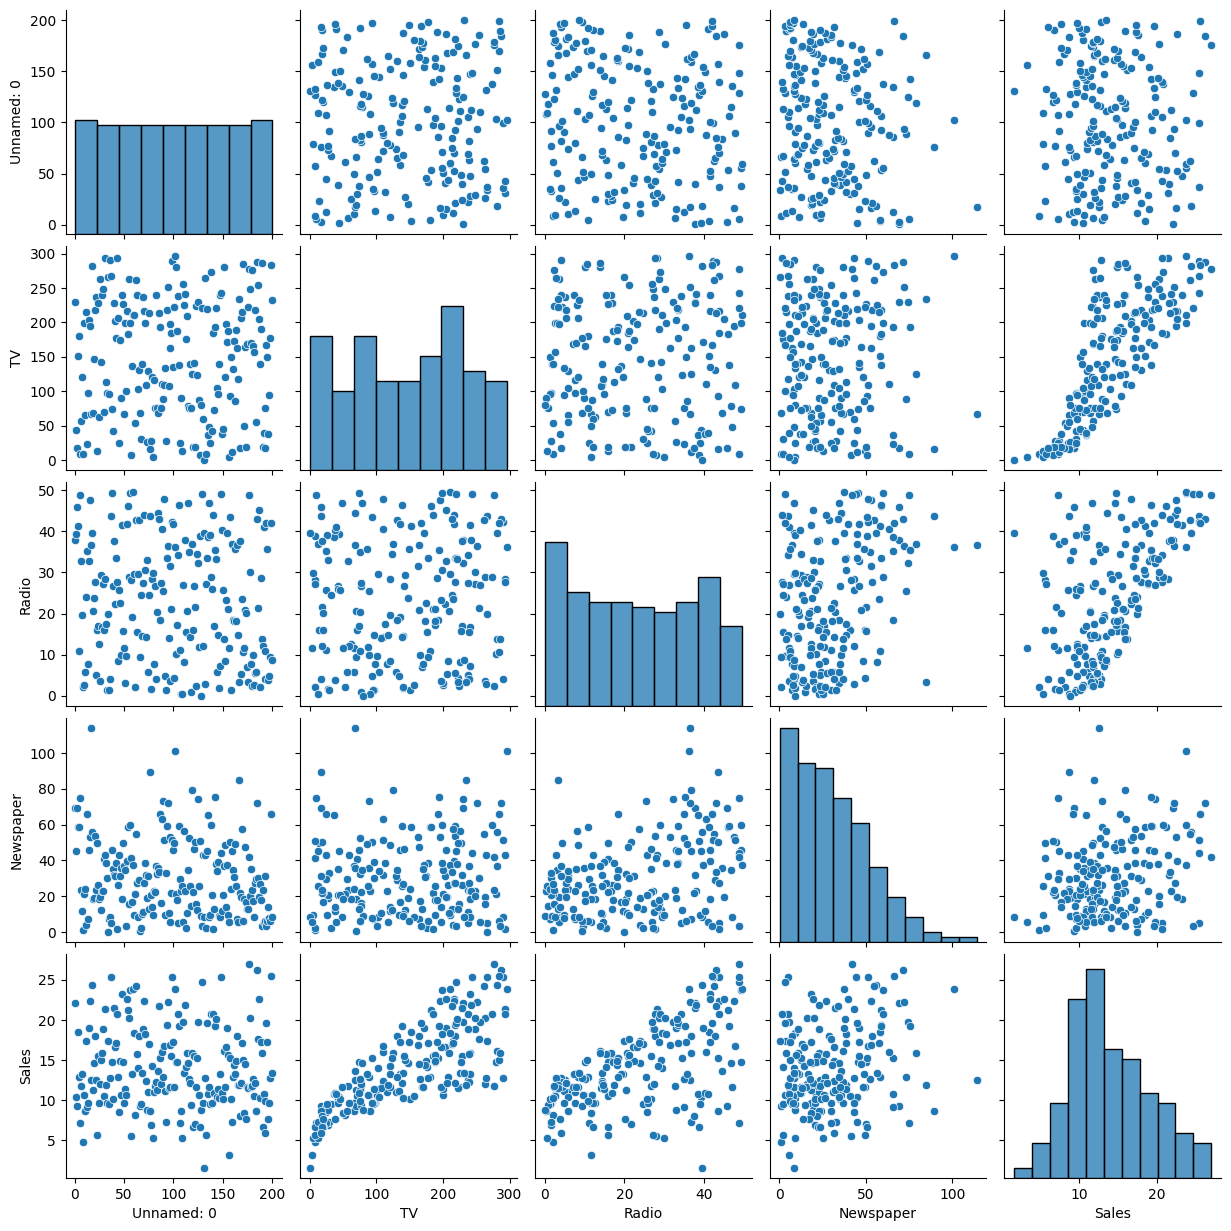

In [13]:
sns.pairplot(df)

<Axes: >

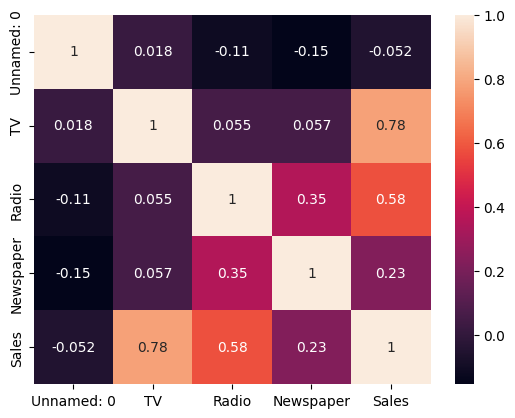

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
df1=df.drop(['Unnamed: 0'],axis=1,inplace=True)


In [16]:
x=df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [17]:
y=df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [20]:
model=LinearRegression()

In [21]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:
ypred=model.predict(x_test)
ypred

array([10.53556655,  8.57951596, 18.46075078, 20.71241938, 14.40290056,
       21.18410279,  8.76865325, 17.30498425, 11.9180761 ,  9.07937915,
       14.38782383,  6.92358153,  7.38929677, 14.21854821, 16.37338114,
       17.28304387, 20.90507526,  9.70221106,  5.62159678, 15.2849958 ,
       16.26948359, 19.92154264,  9.45943861,  8.96445592,  6.06669001,
        3.47838103, 19.67140001, 11.79328522,  8.07979599,  6.43717632,
       15.57634739, 12.14953032, 21.22649923, 12.27860543, 19.04755998,
       10.78318498, 16.26774512, 17.73535302, 21.36616523, 15.25958171,
       18.17353885, 12.50758209, 23.54984045, 18.04854902, 15.99354444,
       10.80295306, 20.00737395,  6.09959864, 22.51078504, 12.239768  ,
       15.51809795, 11.60640076, 12.3160709 , 12.8486508 ,  7.86321718,
       12.52847896, 13.48576024, 17.05466698, 21.8221846 ,  6.92736328])

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(ypred,y_test)*100

84.41380477273155

<ipython-input-25-35c87b82352e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Sales'], hist=False, color="r", label="Actual Value")
<ipython-input-25-35c87b82352e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred, hist=False, color="b", label="Fitted Values" 

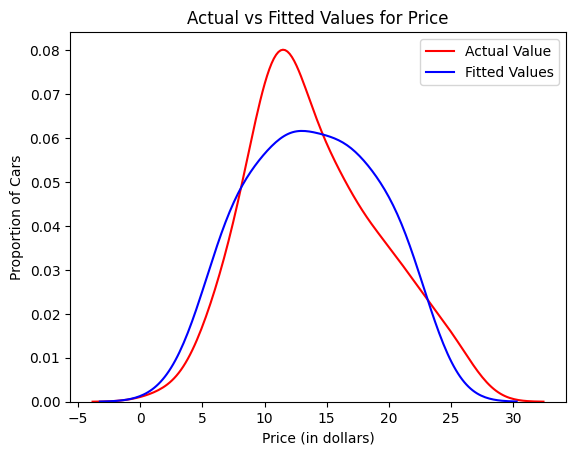

In [25]:
figsize=(30, 25)

ax1 = sns.distplot(df['Sales'], hist=False, color="r", label="Actual Value")
sns.distplot(ypred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()